###  Importing Libraries and loading the dataset

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./loan.csv", sep=",")

C:\Users\Parth R\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [244]:
df.shape

(39717, 111)

###  Data Cleaning

In [245]:
#checking number of columns with more than 85% of null values 
null_columns = np.array(df.columns[100*(df.isnull().sum()/len(df.index))>85])
print(null_columns)

['mths_since_last_record' 'next_pymnt_d' 'mths_since_last_major_derog'
 'annual_inc_joint' 'dti_joint' 'verification_status_joint' 'tot_coll_amt'
 'tot_cur_bal' 'open_acc_6m' 'open_il_6m' 'open_il_12m' 'open_il_24m'
 'mths_since_rcnt_il' 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m'
 'max_bal_bc' 'all_util' 'total_rev_hi_lim' 'inq_fi' 'total_cu_tl'
 'inq_last_12m' 'acc_open_past_24mths' 'avg_cur_bal' 'bc_open_to_buy'
 'bc_util' 'mo_sin_old_il_acct' 'mo_sin_old_rev_tl_op'
 'mo_sin_rcnt_rev_tl_op' 'mo_sin_rcnt_tl' 'mort_acc'
 'mths_since_recent_bc' 'mths_since_recent_bc_dlq' 'mths_since_recent_inq'
 'mths_since_recent_revol_delinq' 'num_accts_ever_120_pd' 'num_actv_bc_tl'
 'num_actv_rev_tl' 'num_bc_sats' 'num_bc_tl' 'num_il_tl' 'num_op_rev_tl'
 'num_rev_accts' 'num_rev_tl_bal_gt_0' 'num_sats' 'num_tl_120dpd_2m'
 'num_tl_30dpd' 'num_tl_90g_dpd_24m' 'num_tl_op_past_12m' 'pct_tl_nvr_dlq'
 'percent_bc_gt_75' 'tot_hi_cred_lim' 'total_bal_ex_mort' 'total_bc_limit'
 'total_il_high_credit

In [246]:
#ropping columns with more than 85% of null values
df = df.drop(null_columns,axis=1)

In [247]:
df.shape

(39717, 55)

In [248]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [249]:
# The column int_rate is character type, let's convert it to float
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [250]:
# There are now 2 columns having approx 32 and 64% missing values - 
# description and months since last delinquent

# let's have a look at a few entries in the columns
df.loc[:, ['desc', 'mths_since_last_delinq']].head()
df = df.drop(['desc', 'mths_since_last_delinq'], axis=1)
df.drop('id', axis=1)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,FiSite Research,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,NaN,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,NaN,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [251]:
df.shape

(39717, 53)

In [252]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

# Data Analysis

In [253]:
behav_variables = ["delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

In [254]:
# let's now remove the behaviour variables from analysis
df.drop(behav_variables, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

In [255]:
# also, we will not be able to use the variables zip code, address, state etc.
# the variable 'title' is derived from the variable 'purpose'
# thus let get rid of all these variables as well

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [256]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [257]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

# Univariate Analysis

In [258]:
# default rate
round(np.mean(df['loan_status']), 2)

0.15

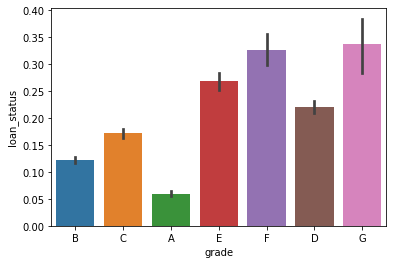

In [259]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

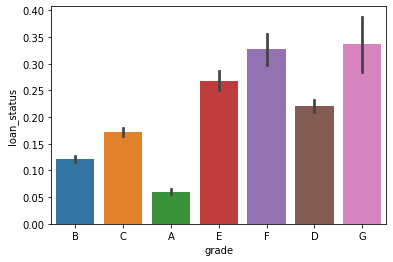

In [260]:
# compare default rates across grade of loan
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

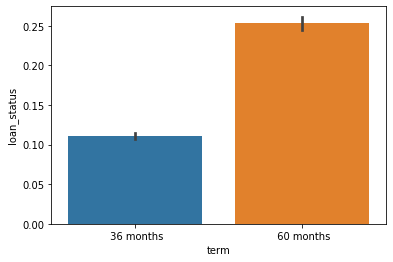

In [261]:
sns.barplot(x='term', y='loan_status', data=df)
plt.show()


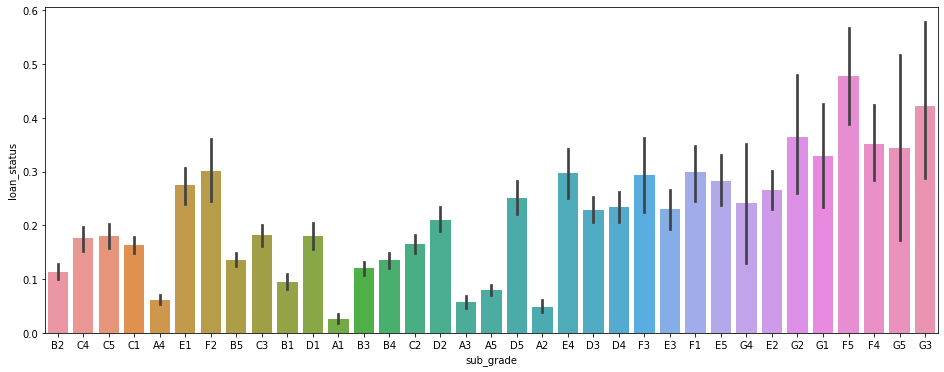

In [262]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(16, 6))
sns.barplot(x='sub_grade', y='loan_status', data=df)
plt.show()

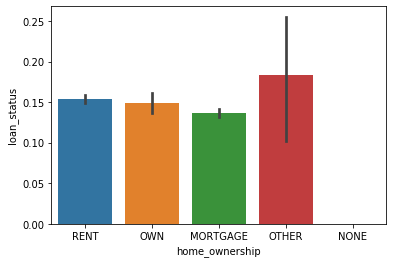

In [263]:
# home ownership: not a great discriminsns.barplot(x='sub_grade', y='loan_status', data=df)
sns.barplot(x='home_ownership', y='loan_status', data=df)
plt.show()


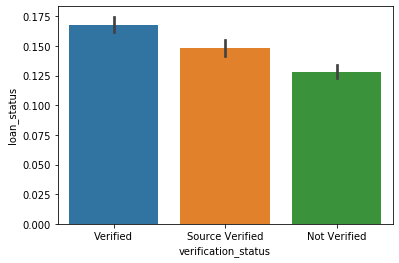

In [264]:
# verification_status: surprisingly, verified loans default more than not verifiedb
sns.barplot(x='verification_status', y='loan_status', data=df)
plt.show()

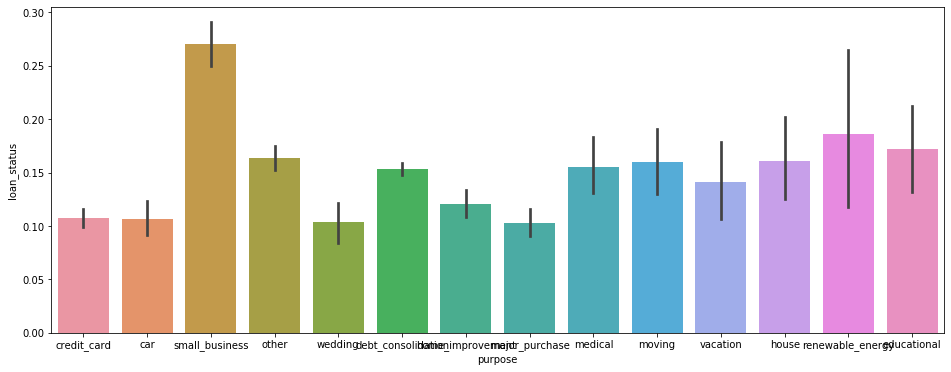

In [265]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
sns.barplot(x='purpose', y='loan_status', data=df)
plt.show()

In [266]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [267]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [268]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [269]:
# let's first observe the number of loans granted across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

In [270]:
# number of loans across months
df.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

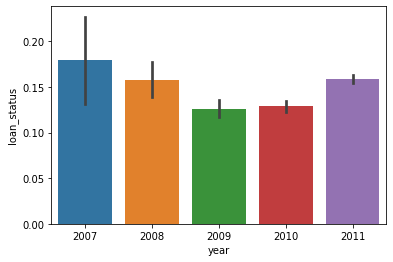

In [271]:
# lets compare the default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
sns.barplot(x='year', y='loan_status', data=df)
plt.show()

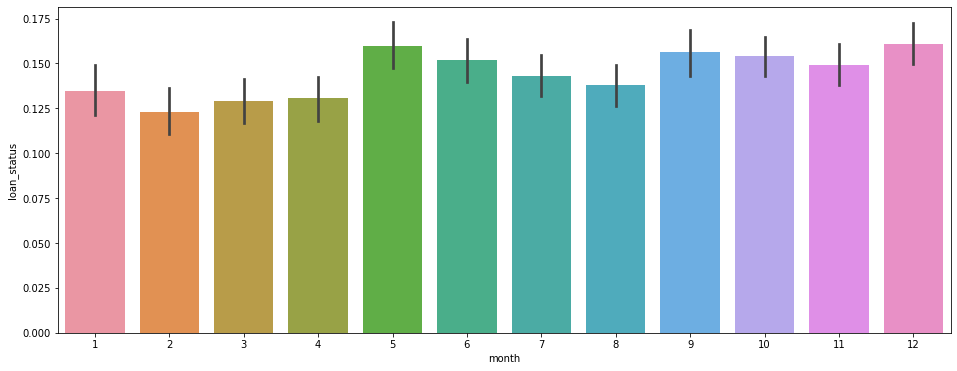

In [272]:
plt.figure(figsize=(16, 6))
sns.barplot(x='month', y='loan_status', data=df)
plt.show()

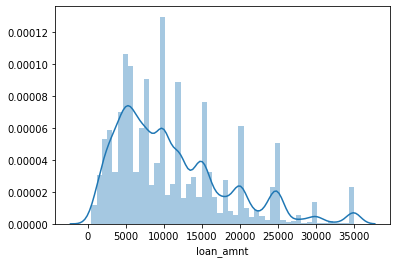

In [273]:
# loan amount: the median loan amount is around 10,000
sns.distplot(df['loan_amnt'])
plt.show()

In [274]:
# binning loan amount
def loan_amnt(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amnt(x))

In [275]:
df['loan_amnt'].value_counts()

medium       20675
high          7696
low           7444
very high     2762
Name: loan_amnt, dtype: int64

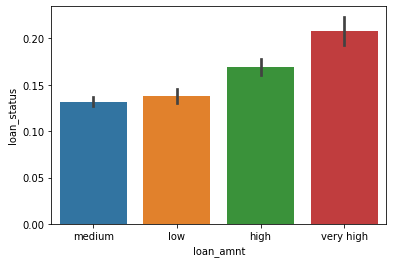

In [276]:
# higher the loan amount, higher the default rate
sns.barplot(x='loan_amnt', y='loan_status', data=df)
plt.show()

In [277]:
# let's also convert funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amnt(x))

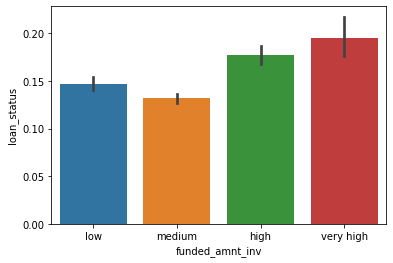

In [278]:
# funded amount invested
sns.barplot(x='funded_amnt_inv', y='loan_status', data=df)
plt.show()

In [279]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

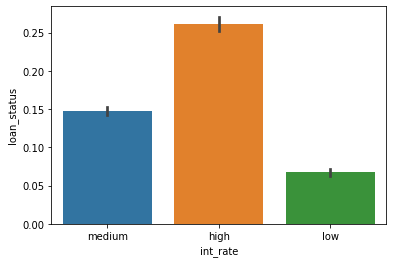

In [280]:
# comparing default rates across rates of interest
# high interest rates default more, as expected
sns.barplot(x='int_rate', y='loan_status', data=df)
plt.show()

In [281]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

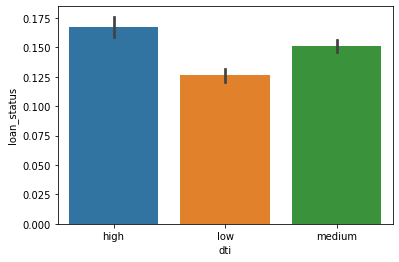

In [282]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
sns.barplot(x='dti', y='loan_status', data=df)
plt.show()

In [283]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

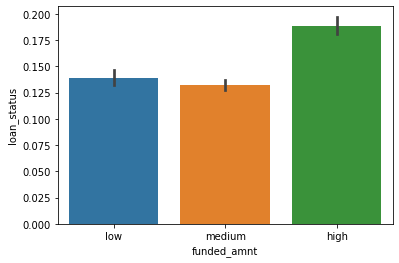

In [284]:
sns.barplot(x='funded_amnt', y='loan_status', data=df)
plt.show()

In [285]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

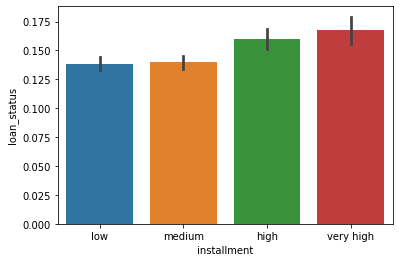

In [286]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
sns.barplot(x = 'installment', y = 'loan_status', data=df)
plt.show()

In [287]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

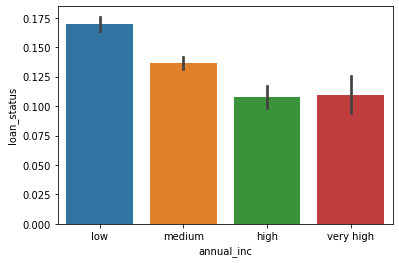

In [288]:
# annual income and default rate
# lower the annual income, higher the default rate
sns.barplot(x= 'annual_inc', y= 'loan_status', data=df)
plt.show()